House Price prediction using ML -Python -XGBoost Regression

Importing the dependencies


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics  # used for Evaluating our model

Importing the Boston House Price dataset

In [ ]:
house_price_dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
house_price_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [ ]:
# Loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data,columns=house_price_dataset.feature_names)

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
house_price_dataframe.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [ ]:
# Add the target (price) column to the Dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [ ]:
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
house_price_dataframe.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
# Checking the number of rows and columns in the data frame
house_price_dataframe.shape

(506, 14)

In [ ]:
# Checkvfor missing values
house_price_dataframe.isnull()

In [ ]:
# Checkvfor missing values
house_price_dataframe.isnull().sum()

In [ ]:
# Statistical measures of the dataset 
house_price_dataframe.describe()

Understanding the correlation between various features in the dataset

1. Positive relation
2. Negative relation

In [ ]:
correlation = house_price_dataframe.corr()
correlation

In [ ]:
# Constructing a heatmap to understand the correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8},cmap="Blues")

# fmt='.1f'  ->  how many values after the decimal 
# annot=True  ->  features are called annot
# annot_kws={'size':8}  ->  size of features and values increases
# cmap = 'Blues'  ->  color of map

Splitting the data and target 

In [ ]:
X = house_price_dataframe.drop(['price'],axis=1)  # axis=1 means column 
Y = house_price_dataframe['price']

In [ ]:
print(X)


In [ ]:
print(Y)

Splitting the data into training data and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X ,Y, test_size = 0.2, random_state=2)
# test_size = 0.2 means 80% training data and 20% means testing data

In [ ]:
X_train

In [ ]:
Y_train

In [ ]:
X_test

In [ ]:
Y_test

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor

In [ ]:
# Loading the model 
model = XGBRegressor()

In [ ]:
# Training the model with X_train
model.fit(X_train,Y_train)

[07:39:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

Evaluation

Prediction on training the data 

In [ ]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [ ]:
training_data_prediction

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_train,training_data_prediction)

print("R squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R squared error :  0.9733349094832763
Mean Absolute error :  1.145314053261634


Visualizing the actual prices and predicted prices

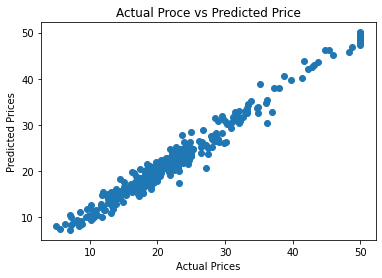

In [ ]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Proce vs Predicted Price")
plt.show()

Prediction on Test Data

In [ ]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [ ]:
# R squared error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute error
score_2 = metrics.mean_absolute_error(Y_test,test_data_prediction)

print("R squared error : ",score_1)
print("Mean Absolute error : ",score_2)

R squared error :  0.9115937697657654
Mean Absolute error :  1.9922956859364223
